In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load The Dataset

In [2]:
df=pd.read_excel('Global_Superstore.xlsx',sheet_name='Cleaned_Data')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Delivery Day,Profit Margine,Order Year
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.0,762.18,933.57,Critical,0,0.329998,2012
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.76,923.63,Critical,2,-0.077845,2013
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,1,0.177766,2013
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,2,-0.033376,2013
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,1,0.109963,2013


### Data Understanding & Cleaning 

In [5]:
# Information about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [7]:
# Statistical Summary
df[['Sales','Profit','Profit]].describe()

,Sales,Profit,Profit Margine
count,51290.000000,51290.000000,51290.000000
mean,246.490577,28.610969,0.047428
std,487.565368,174.341003,0.465672
min,0.440000,-6599.980000,-4.733637
25%,30.762500,0.000000,0.000000
50%,85.055000,9.240000,0.169177
75%,251.055000,36.810000,0.333145
max,22638.480000,8399.980000,0.500220


In [8]:
# Check Missing Value
df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
Delivery Day          0
Profit Margine        0
Order Year            0
dtype: int64

In [11]:
# Remove duplicates if any
df.duplicated().sum()

np.int64(0)

### Feature Engineering

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.strftime('%b')

### Aggregation & Insights

In [21]:
# Total Sales and Profit by Category using Groupby
category_analysis=df.groupby('Category')[['Sales','Profit']].sum()
category_analysis

,Sales,Profit
Category,,
Furniture,4110874.02,285204.42
Office Supplies,3787070.13,518472.85
Technology,4744557.56,663779.35


In [19]:
# Delivery Performance Analysis Using Groupby
delivery_performance=df.groupby('Delivery Day')[['Profit']].mean().head()
delivery_performance

,Profit
Delivery Day,
0,28.250673
1,26.125343
2,29.221141
3,27.215208
4,28.980928


In [24]:
# Monthly Sales Trend Analysis Using Groupby
monthly_sales=df.groupby(['Month'])[['Sales']].sum()
monthly_sales

,Sales
Month,
1,675133.68
2,543739.40
3,770500.93
4,698561.34
5,904012.33
6,1269716.54
7,749381.72
8,1293833.12
9,1437380.15


In [27]:
# Yearly Sales Trend Analysis Using Groupby
yearly_sales=df.groupby(['Year'])[['Sales']].sum()
yearly_sales

,Sales
Year,
2011,2259450.63
2012,2677438.67
2013,3405746.57
2014,4299865.84


### Data Visualization

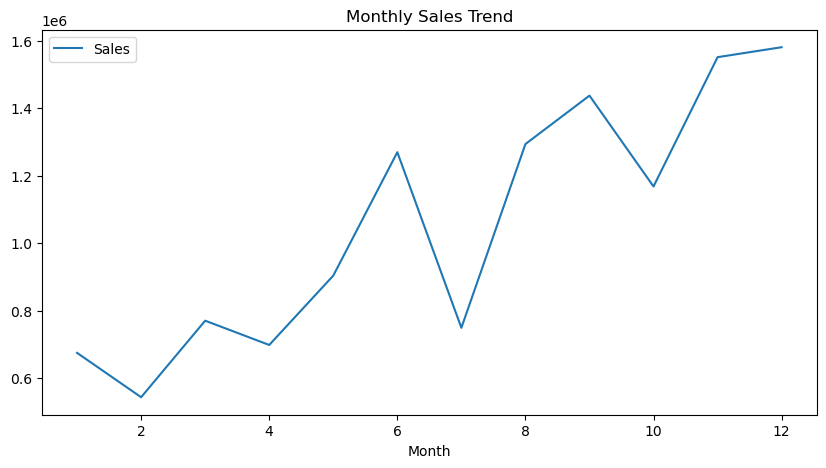

In [25]:
# Monthly Sales Trend 
monthly_sales.plot(kind='line', figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.show()

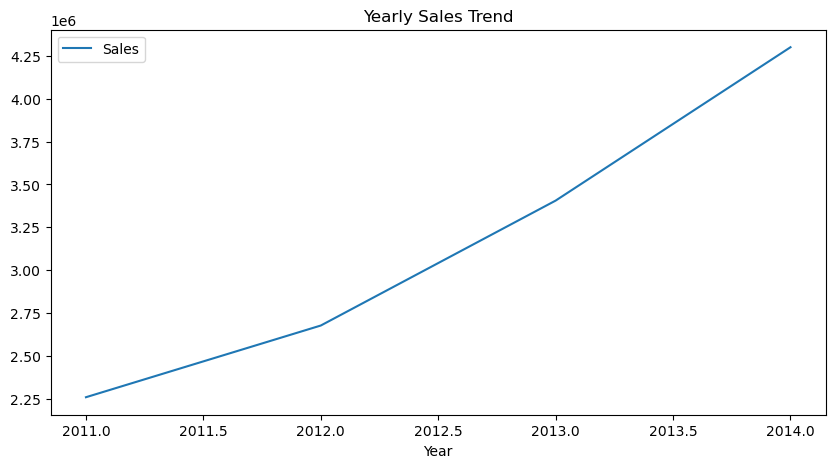

In [28]:
# Yearly Sales Trend
yearly_sales.plot(kind='line', figsize=(10,5))
plt.title("Yearly Sales Trend")
plt.show()

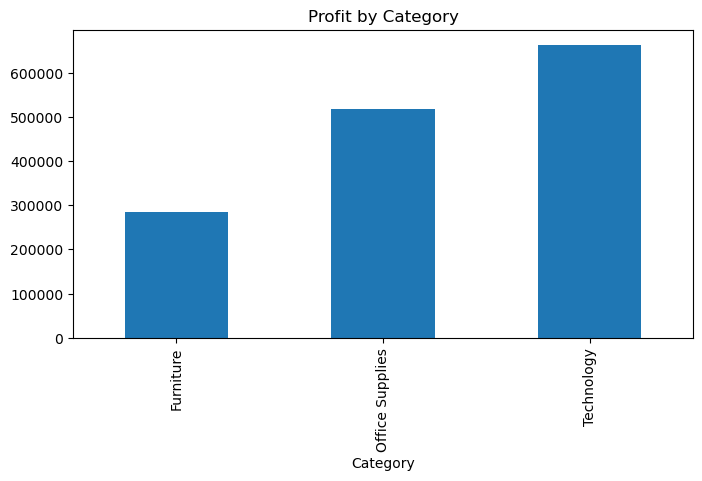

In [29]:
# Total Sales and Profit by Category
category_analysis['Profit'].plot(kind='bar', figsize=(8,4))
plt.title("Profit by Category")
plt.show()

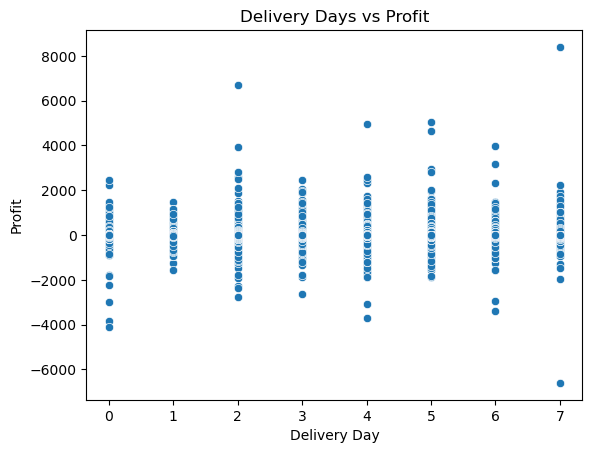

In [31]:
# Delivery Performance
sns.scatterplot(data=df, x='Delivery Day', y='Profit')
plt.title("Delivery Days vs Profit")
plt.show()
